# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pywaffle --quiet
from pywaffle import Waffle
from wordcloud import WordCloud
import plotly.offline as py
# !pip install matplotlib --upgrade
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 35.8 MB/s eta 0:00:00


# Import Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/GFP - GROUP E/nyc-rolling-sales (KAGGLE).csv"
df = pd.read_csv(path)
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4.0,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,NaN,C2,153 AVENUE B,...,5.0,0.0,5.0,1633,6440,"1,900.0",2.0,C2,6625000,2017-07-19 00:00:00
1,4.0,4.0,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976.0,15.0,NaN,A5,21-20 81ST STREET,...,1.0,0.0,1.0,1800,1224,"1,950.0",1.0,A5,792000,2017-07-26 00:00:00
2,4.0,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,"5,426.0",32.0,NaN,A6,3 OCEAN DRIVEWAY,...,1.0,0.0,1.0,2500,540,"1,910.0",1.0,A6,-,2017-06-03 00:00:00
3,4.0,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,"6,360.0",157.0,NaN,A5,36 BAY 10TH STREET,...,1.0,0.0,1.0,1547,1428,"1,930.0",1.0,A5,800000,2017-02-27 00:00:00
4,4.0,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,"3,030.0",65.0,NaN,A1,4455 PARK AVENUE,...,1.0,0.0,1.0,1622,1587,"1,899.0",1.0,A1,140000,2017-05-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84544,"26,736.0",4.0,WOODSIDE,44 CONDO PARKING,4,"2,324.0","1,162.0",NaN,RG,63-14 QUEENS BOULEVARD,...,0.0,0.0,1.0,-,-,"2,008.0",4.0,RG,-,2017-03-17 00:00:00
84545,"26,737.0",4.0,WOODSIDE,44 CONDO PARKING,4,"2,324.0","1,163.0",NaN,RG,63-14 QUEENS BOULEVARD,...,0.0,0.0,1.0,-,-,"2,008.0",4.0,RG,-,2017-03-17 00:00:00
84546,"26,738.0",4.0,WOODSIDE,46 CONDO STORE BUILDINGS,4,"2,324.0","1,007.0",NaN,RK,63-14 QUEENS BOULEVARD,...,0.0,0.0,1.0,-,-,"2,008.0",4.0,RK,831250,2017-03-15 00:00:00
84547,"26,739.0",4.0,WOODSIDE,46 CONDO STORE BUILDINGS,4,"2,324.0","1,008.0",NaN,RK,63-14 QUEENS BOULEVARD,...,0.0,0.0,1.0,-,-,"2,008.0",4.0,RK,-,2017-03-15 00:00:00


# Data Manipulation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84549 entries, 0 to 84548
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  float64
 1   BOROUGH                         84548 non-null  float64
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  float64
 6   LOT                             84548 non-null  float64
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  float64
 12  RESIDENTIAL UNITS               

In [ ]:
#SALE PRICE is object but should be numeric
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

#LAND and GROSS SQUARE FEET is object but should be numeric
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

#Both TAX CLASS attributes should be categorical
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [ ]:
# Replacing numeric values with BOROUGH names
df['BOROUGH'] = df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

In [ ]:
#SALE DATE is object but should be datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

# Creating year and month columns from date
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month

# data dtype
# df['sale_year'] = pd.to_datetime(df['sale_year']).dt.normalize()
# df['sale_month'] = pd.to_datetime(df['sale_month']).dt.normalize()

# df['sale_year'] = pd.to_datetime(df['sale_year'], errors='coerce')
# df['sale_month'] = pd.to_datetime(df['sale_month'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84549 entries, 0 to 84548
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      84548 non-null  float64       
 1   BOROUGH                         84548 non-null  object        
 2   NEIGHBORHOOD                    84548 non-null  object        
 3   BUILDING CLASS CATEGORY         84548 non-null  object        
 4   TAX CLASS AT PRESENT            83810 non-null  category      
 5   BLOCK                           84548 non-null  float64       
 6   LOT                             84548 non-null  float64       
 7   EASE-MENT                       0 non-null      float64       
 8   BUILDING CLASS AT PRESENT       83810 non-null  object        
 9   ADDRESS                         84548 non-null  object        
 10  APARTMENT NUMBER                19052 non-null  object        
 11  ZI

# Data Cleaning

## Null Values

In [ ]:
df.isnull().sum() * 100 / len(df)

Unnamed: 0                       0.0011827460998947356
BOROUGH                          0.0011827460998947356
NEIGHBORHOOD                     0.0011827460998947356
BUILDING CLASS CATEGORY          0.0011827460998947356
TAX CLASS AT PRESENT                0.8740493678222097
BLOCK                            0.0011827460998947356
LOT                              0.0011827460998947356
EASE-MENT                                        100.0
BUILDING CLASS AT PRESENT           0.8740493678222097
ADDRESS                          0.0011827460998947356
APARTMENT NUMBER                      77.4663213048055
ZIP CODE                         0.0011827460998947356
RESIDENTIAL UNITS                0.0011827460998947356
COMMERCIAL UNITS                 0.0011827460998947356
TOTAL UNITS                      0.0011827460998947356
LAND SQUARE FEET                    31.050633360536494
GROSS SQUARE FEET                   32.659168056393334
YEAR BUILT                       0.0011827460998947356
TAX CLASS 

In [ ]:
# drop null di kolom sale price karena terdapat 17% data yang null.
# alesan kita nge drop karena menurut kita kalau datanya diatas 5% yg null itu kalau di replace bakalan mempengaruhi hasil agregasi data actual

df.dropna(subset=['SALE PRICE'], inplace=True)

In [ ]:
df.isnull().sum() * 100 / len(df)

Unnamed: 0                                      0.0
BOROUGH                                         0.0
NEIGHBORHOOD                                    0.0
BUILDING CLASS CATEGORY                         0.0
TAX CLASS AT PRESENT             0.9616071556146142
BLOCK                                           0.0
LOT                                             0.0
EASE-MENT                                     100.0
BUILDING CLASS AT PRESENT        0.9616071556146142
ADDRESS                                         0.0
APARTMENT NUMBER                  77.85874519553632
ZIP CODE                                        0.0
RESIDENTIAL UNITS                               0.0
COMMERCIAL UNITS                                0.0
TOTAL UNITS                                     0.0
LAND SQUARE FEET                 30.274193778844644
GROSS SQUARE FEET                31.061482846814407
YEAR BUILT                                      0.0
TAX CLASS AT TIME OF SALE                       0.0
BUILDING CLA

In [ ]:
# drop null di kolom LSFDAN GSF karena terdapat masing-masing 30% dan 31% data yang null.
# alesan kita nge drop karena menurut kita kalau datanya diatas 5% yg null itu kalau di replace bakalan mempengaruhi hasil agregasi data actual

df.dropna(subset=['LAND SQUARE FEET'], inplace=True)
df.dropna(subset=['GROSS SQUARE FEET'], inplace=True)

In [ ]:
df.isnull().sum() * 100 / len(df)

Unnamed: 0                                      0.0
BOROUGH                                         0.0
NEIGHBORHOOD                                    0.0
BUILDING CLASS CATEGORY                         0.0
TAX CLASS AT PRESENT             0.7296244092529641
BLOCK                                           0.0
LOT                                             0.0
EASE-MENT                                     100.0
BUILDING CLASS AT PRESENT        0.7296244092529641
ADDRESS                                         0.0
APARTMENT NUMBER                   86.0252052068651
ZIP CODE                                        0.0
RESIDENTIAL UNITS                               0.0
COMMERCIAL UNITS                                0.0
TOTAL UNITS                                     0.0
LAND SQUARE FEET                                0.0
GROSS SQUARE FEET                               0.0
YEAR BUILT                                      0.0
TAX CLASS AT TIME OF SALE                       0.0
BUILDING CLA

In [ ]:
# drop kolom ease-ment dan apartment number karena semua datanya kosong

df = df.drop(['EASE-MENT', 'APARTMENT NUMBER'], axis=1)

In [ ]:
df.isnull().sum() * 100 / len(df)

Unnamed: 0                                      0.0
BOROUGH                                         0.0
NEIGHBORHOOD                                    0.0
BUILDING CLASS CATEGORY                         0.0
TAX CLASS AT PRESENT             0.7296244092529641
BLOCK                                           0.0
LOT                                             0.0
BUILDING CLASS AT PRESENT        0.7296244092529641
ADDRESS                                         0.0
ZIP CODE                                        0.0
RESIDENTIAL UNITS                               0.0
COMMERCIAL UNITS                                0.0
TOTAL UNITS                                     0.0
LAND SQUARE FEET                                0.0
GROSS SQUARE FEET                               0.0
YEAR BUILT                                      0.0
TAX CLASS AT TIME OF SALE                       0.0
BUILDING CLASS AT TIME OF SALE                  0.0
SALE PRICE                                      0.0
SALE DATE   

In [ ]:
# ngisi null value dengan nilai sebelumnya dengan metode back fill

df['TAX CLASS AT PRESENT'].fillna(method='bfill',axis=0,inplace=True)
df['BUILDING CLASS AT PRESENT'].fillna(method='bfill',axis=0,inplace=True)

In [ ]:
df.isnull().sum() * 100 / len(df)

Unnamed: 0                       0.0
BOROUGH                          0.0
NEIGHBORHOOD                     0.0
BUILDING CLASS CATEGORY          0.0
TAX CLASS AT PRESENT             0.0
BLOCK                            0.0
LOT                              0.0
BUILDING CLASS AT PRESENT        0.0
ADDRESS                          0.0
ZIP CODE                         0.0
RESIDENTIAL UNITS                0.0
COMMERCIAL UNITS                 0.0
TOTAL UNITS                      0.0
LAND SQUARE FEET                 0.0
GROSS SQUARE FEET                0.0
YEAR BUILT                       0.0
TAX CLASS AT TIME OF SALE        0.0
BUILDING CLASS AT TIME OF SALE   0.0
SALE PRICE                       0.0
SALE DATE                        0.0
sale_year                        0.0
sale_month                       0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48244 entries, 0 to 84510
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      48244 non-null  float64       
 1   BOROUGH                         48244 non-null  object        
 2   NEIGHBORHOOD                    48244 non-null  object        
 3   BUILDING CLASS CATEGORY         48244 non-null  object        
 4   TAX CLASS AT PRESENT            48244 non-null  category      
 5   BLOCK                           48244 non-null  float64       
 6   LOT                             48244 non-null  float64       
 7   BUILDING CLASS AT PRESENT       48244 non-null  object        
 8   ADDRESS                         48244 non-null  object        
 9   ZIP CODE                        48244 non-null  float64       
 10  RESIDENTIAL UNITS               48244 non-null  float64       
 11  CO

## Outliers

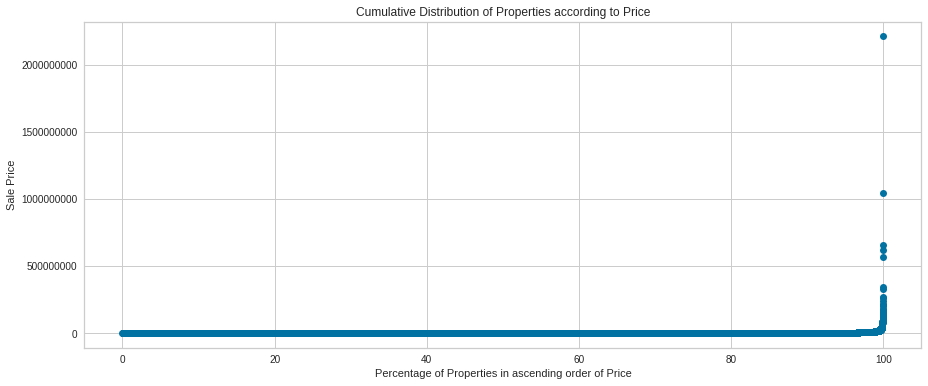

In [ ]:
#Set the size of the plot
plt.figure(figsize=(15,6))

#Get the data and format it
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
# Remove observations that fall outside those caps
# 200.000 kita dapat dari website resmi nya department of finance
# 5.000.000 batas maksimal kemampuan beli target pasar

df = df[(df['SALE PRICE'] > 200000) & (df['SALE PRICE'] < 5000000)]
# df = df[(df['SALE PRICE'] > 200000)]

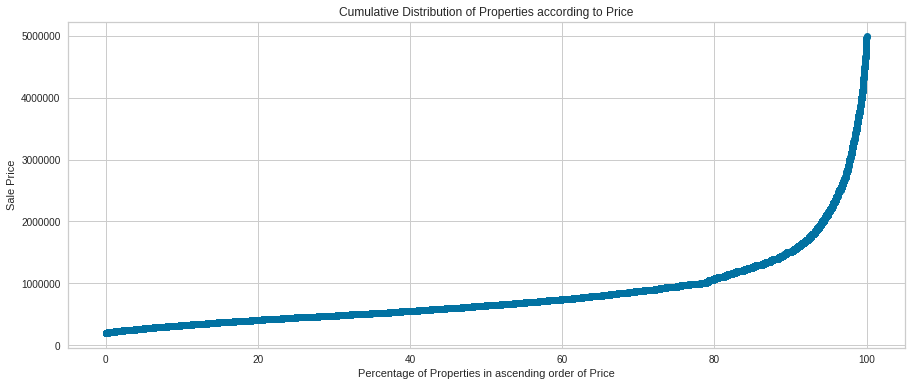

In [ ]:
#Set the size of the plot
plt.figure(figsize=(15,6))

#Get the data and format it
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

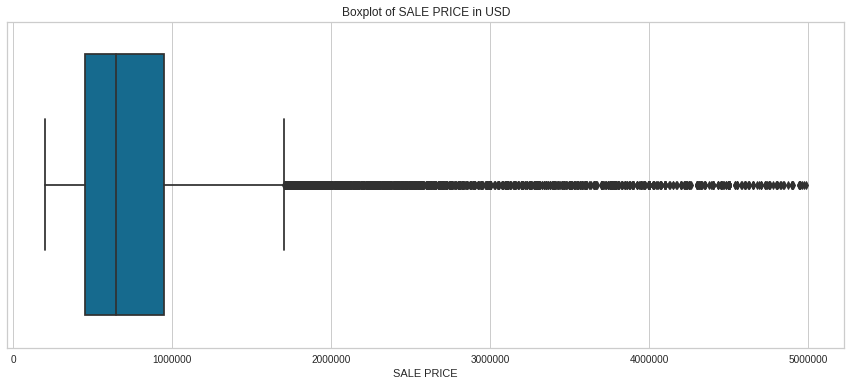

In [ ]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



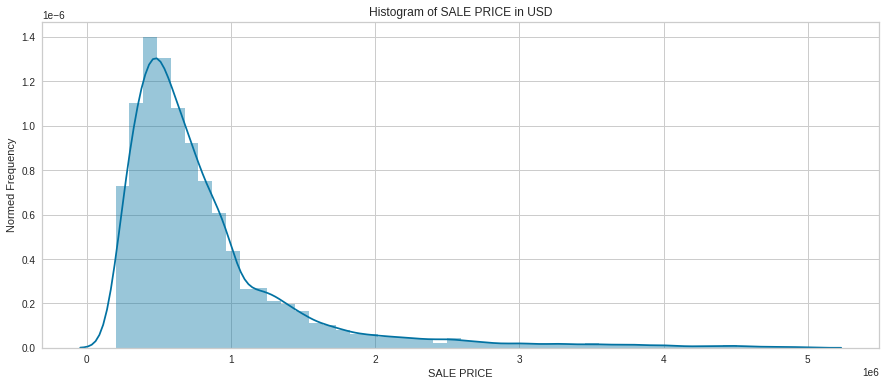

In [ ]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(df['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

0.5781871330891684


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



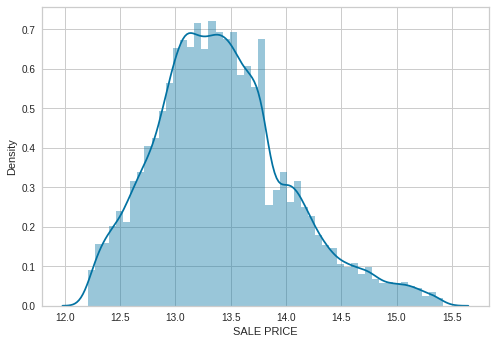

In [ ]:
sales=np.log(df['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

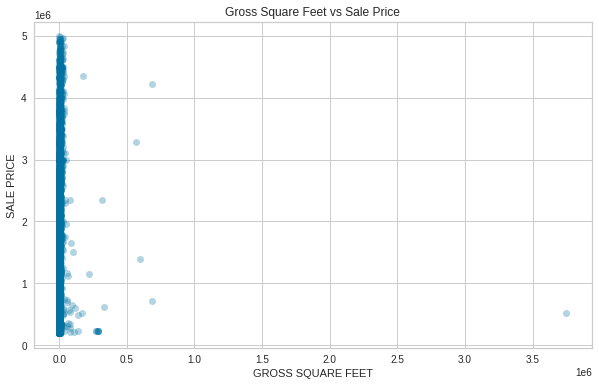

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

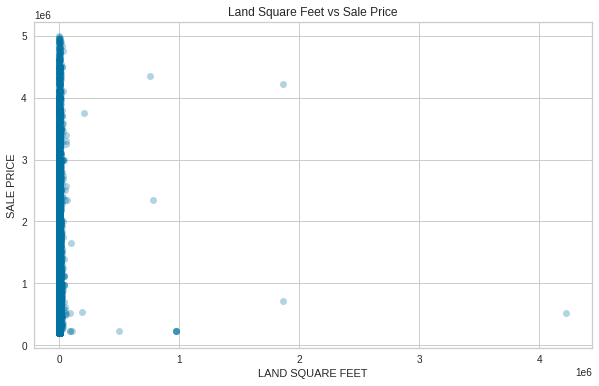

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

In [ ]:
# numerical

descstat = df.describe()                                                               # to seet the descriptive statistics for each variable
col_desc = ['LAND SQUARE FEET','GROSS SQUARE FEET']                     # we determine the numerical column name for further needs
descstat.loc['skewness'] = df[col_desc].skew()                                         # to get the skewness value
descstat.loc['variance'] = df[col_desc].var()

In [ ]:
pd.set_option('display.float_format',  '{:,}'.format) # set the display of numbers so that they are not abbreviated
descstat = round(descstat,2)                          # set the display of numbers to be rounded to 2 digits after the comma
descstat

,Unnamed: 0,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,sale_year,sale_month
count,"32,834.0","32,834.0","32,834.0","32,834.0","32,834.0","32,834.0","32,834.0","32,834.0","32,834.0","32,834.0","32,834.0","32,834.0","32,834.0"
mean,"10,696.82","5,227.49",208.2,"10,976.11",1.72,0.16,1.89,"2,985.87","2,120.63","1,868.8","832,969.38","2,016.66",6.57
std,"7,732.27","3,644.35",410.59,971.56,10.96,12.53,16.72,"30,374.81","22,570.72",382.43,"652,644.16",0.48,3.45
min,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"200,019.0","2,016.0",1.0
25%,"4,076.25","2,261.0",21.0,"10,469.0",1.0,0.0,1.0,"1,560.0","1,008.0","1,920.0","450,000.0","2,016.0",4.0
50%,"8,180.0","4,824.0",45.0,"11,220.0",1.0,0.0,1.0,"2,250.0","1,568.0","1,934.0","644,021.5","2,017.0",6.0
75%,"17,732.75","7,334.0",92.0,"11,362.0",2.0,0.0,2.0,"3,226.75","2,292.0","1,964.0","950,000.0","2,017.0",10.0
max,"26,702.0","16,319.0","7,501.0","11,694.0","1,844.0","2,261.0","2,261.0","4,228,300.0","3,750,565.0","2,017.0","4,986,410.0","2,017.0",12.0
skewness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.1,142.86,NaN,NaN,NaN,NaN
variance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"922,628,873.33","509,437,573.02",NaN,NaN,NaN,NaN


In [ ]:
# Keeps properties with fewer than 15,000 Square Feet, which is about 1,500 Square Metres
df = df[df['GROSS SQUARE FEET'] < 15000]
df = df[df['LAND SQUARE FEET'] < 15000]

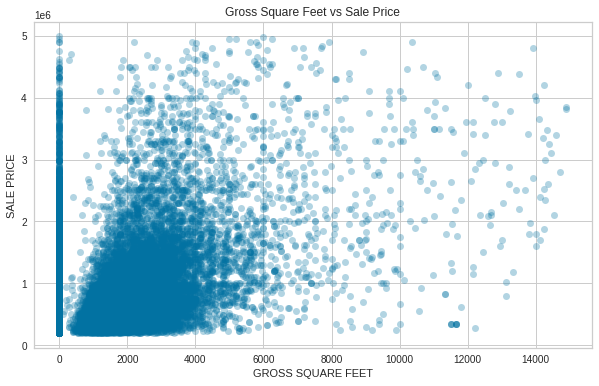

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

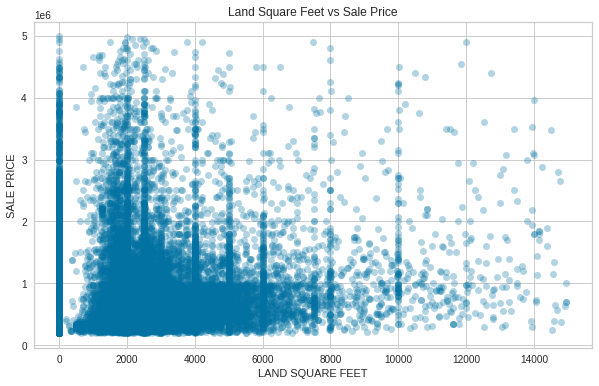

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32555 entries, 1 to 84510
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      32555 non-null  float64       
 1   BOROUGH                         32555 non-null  object        
 2   NEIGHBORHOOD                    32555 non-null  object        
 3   BUILDING CLASS CATEGORY         32555 non-null  object        
 4   TAX CLASS AT PRESENT            32555 non-null  category      
 5   BLOCK                           32555 non-null  float64       
 6   LOT                             32555 non-null  float64       
 7   BUILDING CLASS AT PRESENT       32555 non-null  object        
 8   ADDRESS                         32555 non-null  object        
 9   ZIP CODE                        32555 non-null  float64       
 10  RESIDENTIAL UNITS               32555 non-null  float64       
 11  CO

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32555 entries, 1 to 84510
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         32555 non-null  object        
 1   NEIGHBORHOOD                    32555 non-null  object        
 2   BUILDING CLASS CATEGORY         32555 non-null  object        
 3   TAX CLASS AT PRESENT            32555 non-null  category      
 4   BLOCK                           32555 non-null  float64       
 5   LOT                             32555 non-null  float64       
 6   BUILDING CLASS AT PRESENT       32555 non-null  object        
 7   ADDRESS                         32555 non-null  object        
 8   ZIP CODE                        32555 non-null  float64       
 9   RESIDENTIAL UNITS               32555 non-null  float64       
 10  COMMERCIAL UNITS                32555 non-null  float64       
 11  TO

## Duplicate

In [ ]:
#Checking for duplicated entries
sum(df.duplicated(df.columns))

51

In [ ]:
#Delete the duplicates and check that it worked
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [ ]:
#Remove data where commercial + residential doesn't equal total units
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32430 entries, 1 to 84510
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         32430 non-null  object        
 1   NEIGHBORHOOD                    32430 non-null  object        
 2   BUILDING CLASS CATEGORY         32430 non-null  object        
 3   TAX CLASS AT PRESENT            32430 non-null  category      
 4   BLOCK                           32430 non-null  float64       
 5   LOT                             32430 non-null  float64       
 6   BUILDING CLASS AT PRESENT       32430 non-null  object        
 7   ADDRESS                         32430 non-null  object        
 8   ZIP CODE                        32430 non-null  float64       
 9   RESIDENTIAL UNITS               32430 non-null  float64       
 10  COMMERCIAL UNITS                32430 non-null  float64       
 11  TO

In [ ]:
# bangunan tidak mungkin dibangun pada tahun 0

df = df[df['YEAR BUILT'] > 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31150 entries, 1 to 84510
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         31150 non-null  object        
 1   NEIGHBORHOOD                    31150 non-null  object        
 2   BUILDING CLASS CATEGORY         31150 non-null  object        
 3   TAX CLASS AT PRESENT            31150 non-null  category      
 4   BLOCK                           31150 non-null  float64       
 5   LOT                             31150 non-null  float64       
 6   BUILDING CLASS AT PRESENT       31150 non-null  object        
 7   ADDRESS                         31150 non-null  object        
 8   ZIP CODE                        31150 non-null  float64       
 9   RESIDENTIAL UNITS               31150 non-null  float64       
 10  COMMERCIAL UNITS                31150 non-null  float64       
 11  TO

In [ ]:
# remove space and add _ character each column
df.columns = df.columns.str.replace(' ', '_')

#make column names lowercase for ease of readability and further processing
df.columns = df.columns.str.lower()
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'sale_year', 'sale_month'],
      dtype='object')

# Download Clean Data

In [ ]:
# from google.colab import drive

# df

# drive.mount('/content/drive')
# path = '/content/drive/My Drive/GFP PYTHON/gfp_clean.csv' #ganti folder name untuk lokasi penyimpanan dan file name hasil dari dataframe

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df.to_csv(f) # df2 diganti dengan nama data frame yang pengin disimpan dengan to_csv()

# Descriptive

In [ ]:
df_clean = df.copy()

In [ ]:
# numerical

descstat = df_clean.describe()
col_desc = ['block','lot','zip_code','residential_units','commercial_units','total_units','land_square_feet','gross_square_feet',
            'year_built','sale_price']
descstat.loc['skewness'] = df_clean[col_desc].skew()
descstat.loc['variance'] = df_clean[col_desc].var()

In [ ]:
pd.set_option('display.float_format',  '{:,}'.format)
descstat = round(descstat,2)
descstat

,block,lot,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,sale_year,sale_month
count,"31,150.0","31,150.0","31,150.0","31,150.0","31,150.0","31,150.0","31,150.0","31,150.0","31,150.0","31,150.0","31,150.0","31,150.0"
mean,"5,316.76",177.03,"11,042.02",1.59,0.15,1.74,"2,493.29","1,770.79","1,946.42","817,095.1","2,016.65",6.58
std,"3,662.14",372.66,467.48,1.44,12.82,12.89,"1,896.83","1,453.15",34.17,"629,949.71",0.48,3.46
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"1,800.0","200,019.0","2,016.0",1.0
25%,"2,334.0",21.0,"10,469.0",1.0,0.0,1.0,"1,667.0","1,100.0","1,920.0","445,000.0","2,016.0",4.0
50%,"4,910.0",43.0,"11,221.0",1.0,0.0,1.0,"2,300.0","1,600.0","1,935.0","635,000.0","2,017.0",6.0
75%,"7,400.0",80.0,"11,365.0",2.0,0.0,2.0,"3,240.0","2,310.0","1,965.0","941,881.0","2,017.0",10.0
max,"16,319.0","3,597.0","11,694.0",48.0,"2,261.0","2,261.0","14,960.0","14,900.0","2,017.0","4,975,000.0","2,017.0",12.0
skewness,0.74,2.9,-4.49,5.88,176.22,172.91,1.55,2.46,0.58,2.72,NaN,NaN
variance,"13,411,304.96","138,871.94","218,533.69",2.08,164.27,166.13,"3,597,957.96","2,111,656.34","1,167.26","396,836,640,394.94",NaN,NaN


In [ ]:
# categorical

df_clean.describe(exclude = np.number)

<ipython-input-143-6117ec603ef2>:3: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,borough,neighborhood,building_class_category,tax_class_at_present,building_class_at_present,address,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_date
count,31150,31150,31150,31150,31150,31150,"31,150.0",31150,31150
unique,5,238,33,9,104,28794,3.0,105,318
top,Brooklyn,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,A1,429 KENT AVENUE,1.0,A1,2017-04-28 00:00:00
freq,12567,754,11876,23394,4440,156,"23,762.0",4435,207
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-31 00:00:00


1. there is 31150 data recorded
2. average sale price 817,095.1
3. the most property sold on borough is located in brooklyn
4. average LSF 2,493.29
5. average GSF 1,770.79
6. average year built 1,946.42 means most of property are vintage!
7. the most property sold in neighborhood is FLUSHING-NORTH
8. 01 ONE FAMILY DWELLINGS	is the most popular building class category on NYC

# EDA

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, 12)]
data = [{
    'y' : df_clean.sale_price[df_clean.sale_month == ind],
    'type':'box',
    'name' : months[ind - 1],
    'marker':{'color': colors[ind - 1]}
} for ind in range(1,13)]

layout = go.Layout(
    title='Housing Prices by Months',
    xaxis=dict(
        title='Month'
    ),
    yaxis=dict(
        title='Sale Price'
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig = go.Figure(data=data, layout=layout)
#dat = [trace0, trace1, trace2, trace3, trace4]
py.iplot(fig)

AttributeError: ignored

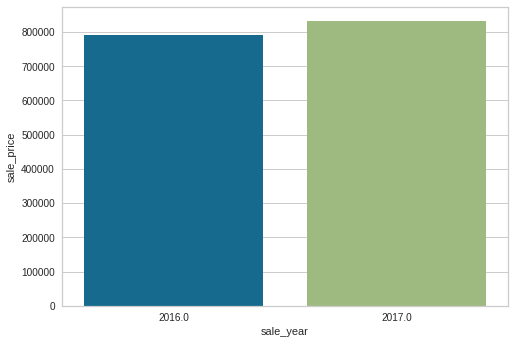

In [ ]:
# sns.barplot(x = df.sale_year, y = df.sale_price).set_title("Sale Price by Year")

ax = sns.barplot(x = 'sale_year',
            y = 'sale_price',
            data = df_clean,
            estimator = np.average,
            ci = 0)

for i in ax.containers:
    ax.bar_label(i,)

2017 is the highest sale price than 2016 with average sale price 831,729

In [ ]:
df_bar=df_clean[['sale_month', 'sale_price']].groupby(by='sale_month').count().sort_values(by='sale_month', ascending=True).reset_index()
df_bar.columns.values[1]='Sales_count'

plt.figure(figsize=(12,6))
ax = sns.barplot(y = 'Sales_count', x = 'sale_month', data = df_bar)
plt.title('Sale Count by Months')
# plt.show()

for i in ax.containers:
    ax.bar_label(i,)

June is the most sales count compare to others month with 3070 property sold

In [ ]:
df_clean = pd.DataFrame(df_clean.groupby(['borough']).mean()).reset_index()
df_clean['borough'][df_clean.borough == 1] = 'Manhattan'
df_clean['borough'][df_clean.borough == 2] = 'Bronx'
df_clean['borough'][df_clean.borough == 3] = 'Brooklyn'
df_clean['borough'][df_clean.borough == 4] = 'Queens'
df_clean['borough'][df_clean.borough == 5] = 'Staten Island'
total = df_clean["land_square_feet"].sum()
trace0 = go.Scatter(
    x=df_clean.borough,
    y=df_clean["land_square_feet"],
    mode='markers',
    marker=dict(
        size=[((x/total)*200) for x in df["land_square_feet"]],
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)', 'rgb(255, 15, 54)'],
    )
)

data = [trace0]
layout = go.Layout(
    title='Average Land Square Feet of Properties in Each Borough',
    xaxis=dict(
        title='Borough',
        gridcolor='rgb(255, 255, 255)',
    ),
    yaxis=dict(
        title='Land square feet',
        gridcolor='rgb(255, 255, 255)',
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bubblechart-size')

Staten Island is the most highest average Land Square Feet between the others borough with average Land Square Feet 3795

In [ ]:
df_clean = pd.DataFrame(df_clean.groupby(['borough']).mean()).reset_index()
df_clean['borough'][df_clean.borough == 1] = 'Manhattan'
df_clean['borough'][df_clean.borough == 2] = 'Bronx'
df_clean['borough'][df_clean.borough == 3] = 'Brooklyn'
df_clean['borough'][df_clean.borough == 4] = 'Queens'
df_clean['borough'][df_clean.borough == 5] = 'Staten Island'
total = df_clean["gross_square_feet"].sum()
trace0 = go.Scatter(
    x=df_clean.borough,
    y=df_clean["gross_square_feet"],
    mode='markers',
    marker=dict(
        size=[((x/total)*200) for x in df["gross_square_feet"]],
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)', 'rgb(255, 15, 54)'],
    )
)

data = [trace0]
layout = go.Layout(
    title='Average Gross Square Feet of Properties in Each Borough',
    xaxis=dict(
        title='Borough',
        gridcolor='rgb(255, 255, 255)',
    ),
    yaxis=dict(
        title='Gross square feet',
        gridcolor='rgb(255, 255, 255)',
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bubblechart-size')

Manhattan is the most highest average Gross Square Feet between the others borough with average Gross Square Feet 4453

In [ ]:
# !pip install matplotlib --upgrade

# Clustering

In [ ]:
df.info()

In [ ]:
df_cluster = df.drop(['borough','neighborhood','building_class_category','tax_class_at_present','block','lot','building_class_at_present','address','zip_code',
                      'year_built','tax_class_at_time_of_sale','building_class_at_time_of_sale','sale_date','sale_year','sale_month'],axis=1)

In [ ]:
df_cluster.info()

In [ ]:
distortions = []
K = range(1,5)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
cluster_model = cluster.KMeans(n_clusters=2, random_state=2)
#cluster_label = cluster_model.fit()
#cluster_label = cluster_model.labels_
#cluster_label = cluster_model.predict(df)
cluster_label = cluster_model.fit_predict(df_cluster)
df_cluster['cluster'] = cluster_label
df_cluster

In [ ]:
df_cluster.groupby('cluster').mean()

In [ ]:
df_cluster['id'] = np.arange(len(df_cluster))
df_cluster

In [ ]:
df_merge = df.merge(df_cluster)
df_merge

In [ ]:
df_merge.duplicated().sum()

In [ ]:
df_merge = df_merge.drop_duplicates(['id'])
df_merge

In [ ]:
df_merge.info()

In [ ]:
df_merge.groupby(['cluster','borough',])['sale_price'].agg(['sum','count','mean','median','max','min']).head(50)

In [ ]:
df_merge.groupby(['cluster','sale_month'])['sale_price'].agg(['sum','count','mean','median','max','min'])

In [ ]:
df_merge.groupby(['cluster','borough',])['total_units'].agg(['sum','count','mean','median','max','min']).head(50)

In [ ]:
df_merge.groupby(['cluster','land_square_feet'])['sale_price'].agg(['sum','count','mean','median','max','min'])

In [ ]:
df_merge.groupby(['cluster','gross_square_feet'])['sale_price'].agg(['sum','count','mean','median','max','min'])

In [ ]:
df_merge.groupby(['cluster','building_class_category'])['sale_price'].agg(['sum','count','mean','median','max','min'])

In [ ]:
df_merge.groupby(['cluster','neighborhood'])['sale_price'].agg(['sum','count','mean','median','max','min'])

In [ ]:
df_merge.groupby(['cluster'])['sale_price'].agg(['sum','count','mean','median','max','min']).head(50)